<a href="https://colab.research.google.com/github/MauriDeluca/pandas/blob/master/calentamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
url = "https://raw.githubusercontent.com/MauriDeluca/pandas/master/CPS1985.csv"

In [ ]:
df = pd.read_csv(url)
print(df.head(10))

   Unnamed: 0   wage  education  ...         sector  union married
0           1   5.10          8  ...  manufacturing     no     yes
1        1100   4.95          9  ...  manufacturing     no     yes
2           2   6.67         12  ...  manufacturing     no      no
3           3   4.00         12  ...          other     no      no
4           4   7.50         12  ...          other     no     yes
5           5  13.07         13  ...          other    yes      no
6           6   4.45         10  ...          other     no      no
7           7  19.47         12  ...          other     no      no
8           8  13.28         16  ...  manufacturing     no     yes
9           9   8.75         12  ...          other     no      no

[10 rows x 12 columns]


In [ ]:
df.drop(df.columns[0], axis='columns', inplace=True)

In [ ]:
df.shape

(534, 11)

In [ ]:
pd.isnull(df).any()

wage          False
education     False
experience    False
age           False
ethnicity     False
region        False
gender        False
occupation    False
sector        False
union         False
married       False
dtype: bool

In [ ]:
df.duplicated(keep = False)

0      False
1      False
2      False
3      False
4      False
       ...  
529    False
530    False
531    False
532    False
533    False
Length: 534, dtype: bool

In [ ]:
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


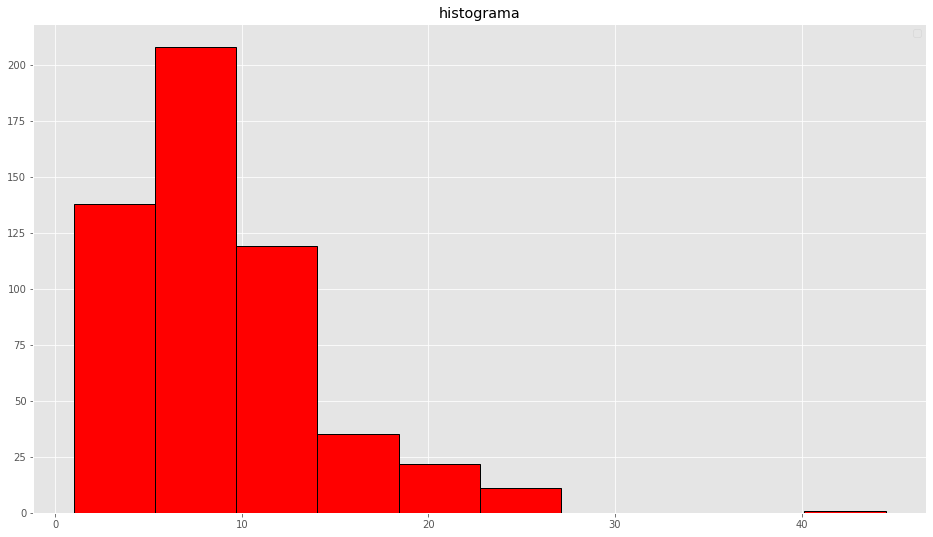

In [ ]:
plt.hist(df["wage"],histtype="bar",color="red",edgecolor = 'black',  linewidth=1)
plt.title ("histograma")
plt.legend()
   
plt.show()

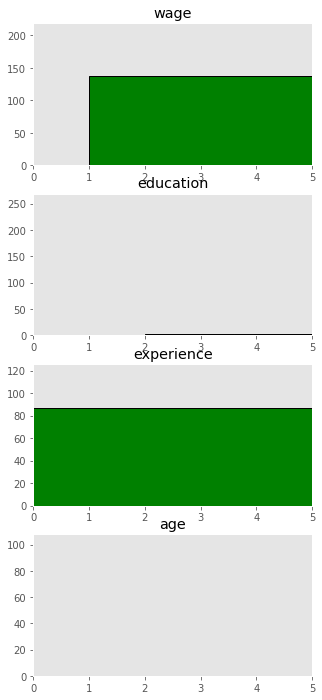

In [ ]:
variables = ["wage", "education", "experience", "age"]

fig = plt.figure(figsize=(5, 12))
for i, v in enumerate(variables):
    fig.add_subplot(4, 1, i+1)
    ax = df[v].plot(kind='hist',color= "green", edgecolor = 'black',  linewidth=1)
    ax.set_xlim([0, 5])
    ax.set_ylabel('')
    ax.set_title(v)
    ax.grid()

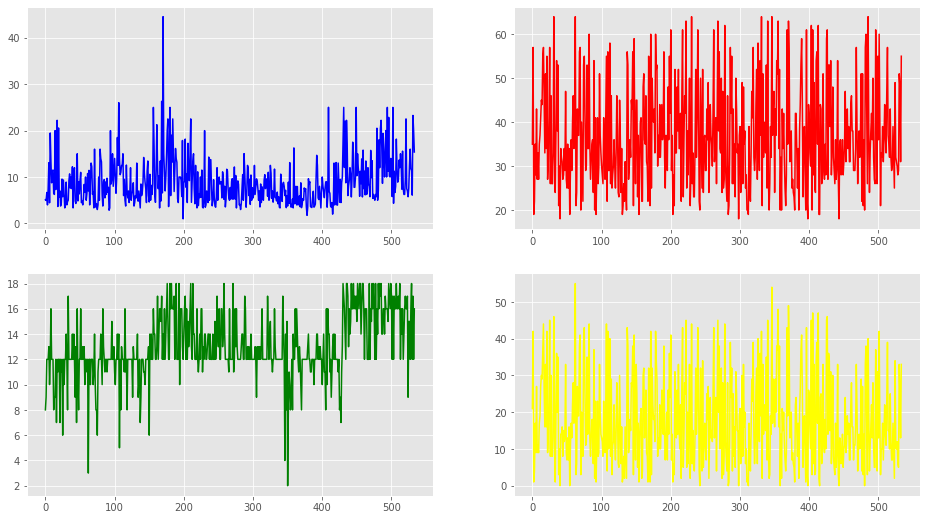

In [ ]:
plt.subplot(221)
plt.plot(df["wage"],color="blue")
plt.subplot
plt.subplot(222)
plt.plot(df["age"],color="red")
plt.subplot(223)
plt.plot(df["education"],color="green")
plt.subplot(224)
plt.plot(df["experience"],color="yellow")

{'boxes': [<matplotlib.lines.Line2D at 0x7fccdd6fa7f0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fccdd759908>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fccdd7f5908>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fccdd7595f8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fccdd6fac50>,
  <matplotlib.lines.Line2D at 0x7fccdd759ac8>]}

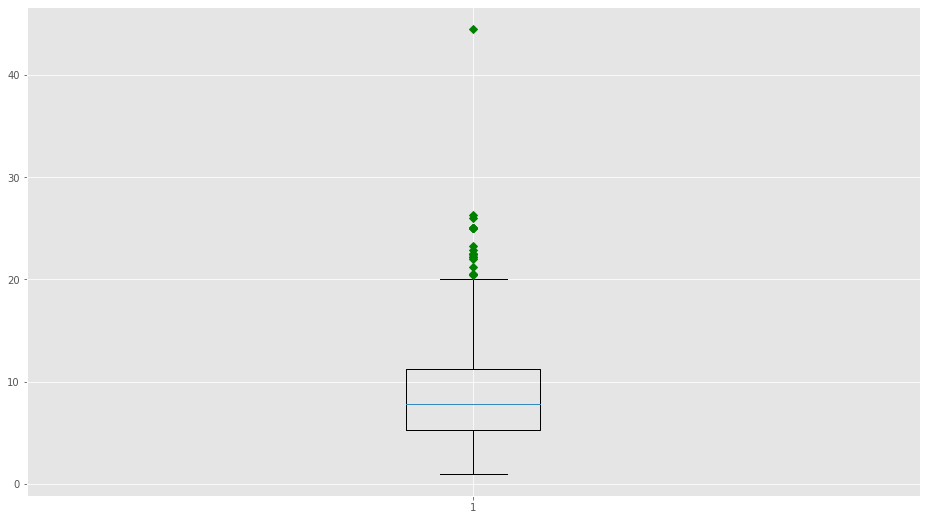

In [ ]:
plt.boxplot(df["wage"], 0, 'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x7fccdd7b4b00>],
 'caps': [<matplotlib.lines.Line2D at 0x7fccdd6c4128>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fccdd6c4940>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fccdd6c4dd8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fccdd7b4cf8>,
  <matplotlib.lines.Line2D at 0x7fccdd7b4860>]}

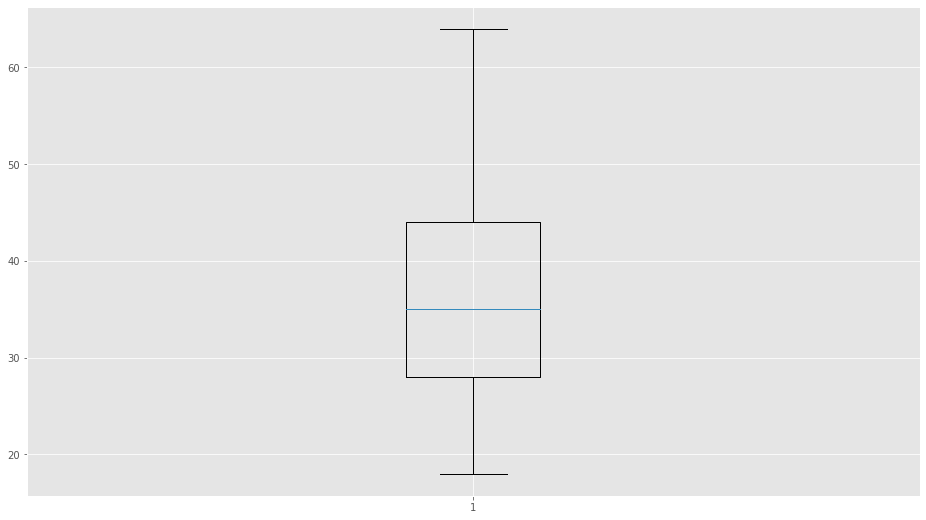

In [ ]:
plt.boxplot(df["age"], 0, 'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x7fcce6d6c2b0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fcce70dd6d8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fccdd7382e8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fccdd738eb8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fccddbc1c50>,
  <matplotlib.lines.Line2D at 0x7fcce70dd4a8>]}

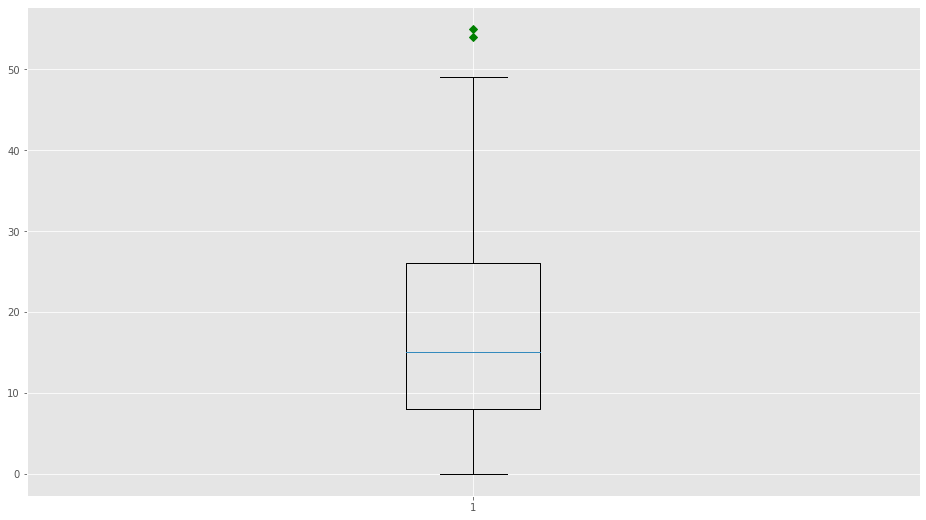

In [ ]:
plt.boxplot(df["experience"], 0, 'gD')

{'boxes': [<matplotlib.lines.Line2D at 0x7fccdd809c88>],
 'caps': [<matplotlib.lines.Line2D at 0x7fccdd8a5668>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fccdd8a52b0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fccdd8a5128>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fccdd8090b8>,
  <matplotlib.lines.Line2D at 0x7fccdd809f60>]}

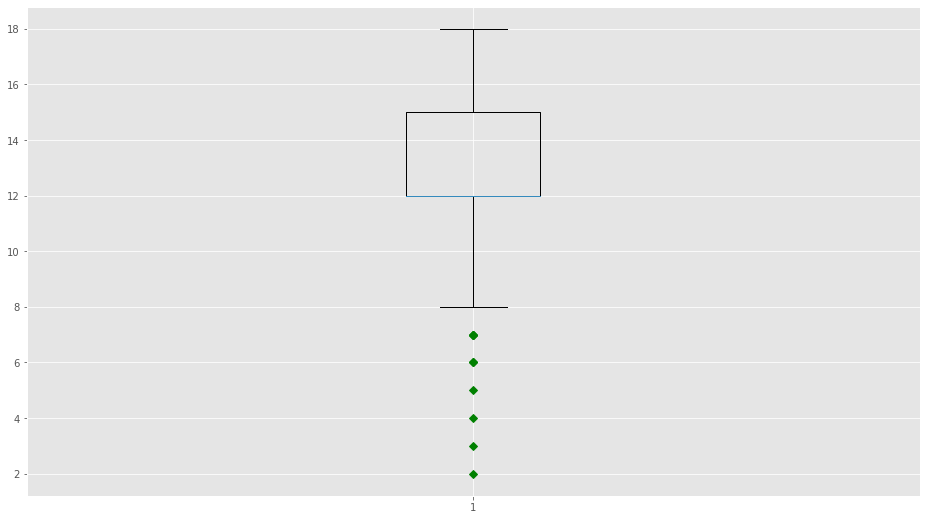

In [ ]:
plt.boxplot(df["education"], 0, 'gD')

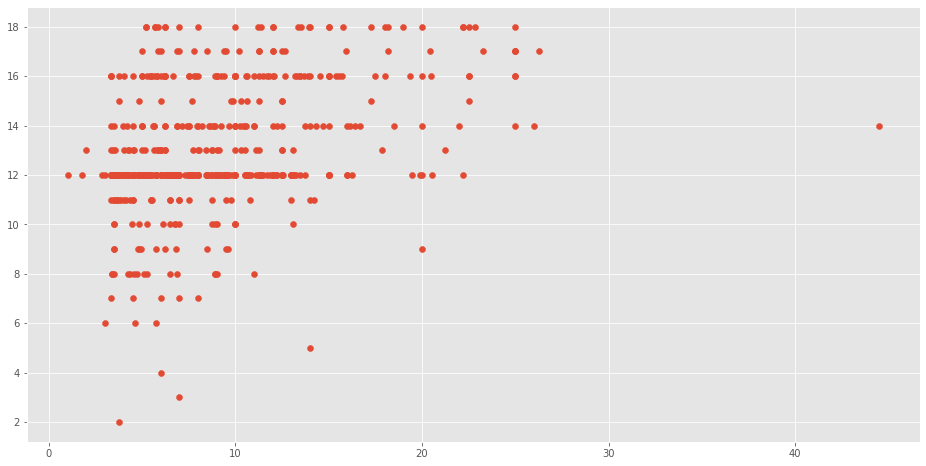

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['wage'], df['education'])
plt.show()

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.95)
IQR = Q3 - Q1

df1 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]



```
#Preguntas sobre el df
Como afectan las variables educacion, experiencia y edad al salario   Regresion
Afectan la etnica, el vivir en el sur, y genero el salario? Correlacion
Que sector es el mejor pago? 
```




In [ ]:
from sklearn.preprocessing import MinMaxScaler
data = df1[["wage","education","age","experience"]]
scaler = MinMaxScaler()
print(scaler.fit(data))
MinMaxScaler()
dfnorm = scaler.transform(data)

MinMaxScaler(copy=True, feature_range=(0, 1))


In [ ]:
print(dfnorm)

[[0.16211941 0.33333333 0.36956522 0.38181818]
 [0.15618822 0.4        0.84782609 0.76363636]
 [0.22419929 0.6        0.02173913 0.01818182]
 ...
 [0.87979439 0.93333333 0.65217391 0.45454545]
 [0.74654013 0.6        0.2826087  0.23636364]
 [0.56860419 0.86666667 0.80434783 0.6       ]]


In [ ]:
from sklearn import preprocessing

data = df1.iloc[:,[0,1,2,3]].values #normalizar antes de seguir
datanorm = (data-data.min())/(data.max()-data.min())
print(datanorm)

[[0.0796875  0.125      0.328125   0.546875  ]
 [0.07734375 0.140625   0.65625    0.890625  ]
 [0.10421875 0.1875     0.015625   0.296875  ]
 ...
 [0.36328125 0.265625   0.390625   0.75      ]
 [0.310625   0.1875     0.203125   0.484375  ]
 [0.2403125  0.25       0.515625   0.859375  ]]


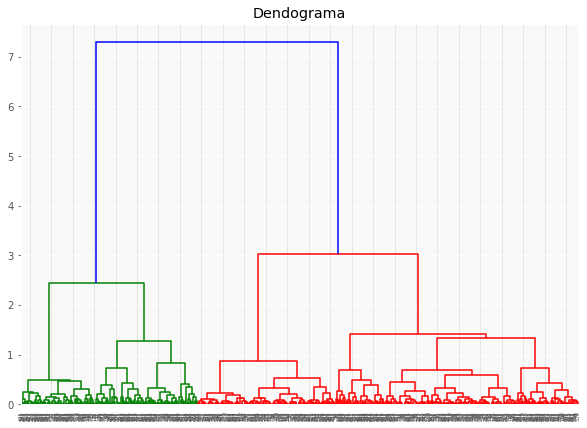

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendograma")  
dend = shc.dendrogram(shc.linkage(datanorm, method='ward'))  

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
categorias = cluster.fit_predict(data)
print(categorias)

[0 1 2 2 0 0 3 0 0 2 0 0 3 3 0 1 1 0 0 1 0 1 2 0 3 1 2 3 2 2 0 1 0 2 0 1 0
 1 2 0 2 0 0 0 2 0 0 0 3 2 2 0 2 0 2 0 0 0 3 3 0 3 1 2 2 3 0 0 1 1 2 0 0 2
 1 1 3 0 0 1 0 0 1 0 2 0 0 0 2 1 2 3 2 2 0 2 0 1 0 0 0 0 2 3 0 0 0 1 2 1 0
 0 1 2 3 2 2 0 0 0 2 0 3 0 2 2 3 0 2 0 2 2 0 2 0 2 2 1 1 2 0 0 0 3 3 1 2 1
 0 2 3 3 2 0 2 0 0 0 2 2 3 1 0 0 3 0 0 2 1 3 1 2 1 3 0 0 0 1 1 1 0 0 0 0 0
 0 3 0 0 1 0 2 0 0 0 3 0 1 3 1 0 0 2 2 2 1 0 0 3 0 1 0 0 0 2 3 1 2 0 3 3 1
 2 0 0 0 1 2 2 1 2 0 2 2 0 1 0 0 1 3 2 2 1 0 2 1 2 0 0 0 0 3 0 3 2 0 3 0 0
 0 3 1 0 0 3 2 3 1 0 1 0 0 1 2 3 2 2 1 0 2 2 3 2 2 0 1 0 1 2 3 2 0 2 1 3 0
 0 2 0 0 2 0 1 2 3 0 0 2 2 2 2 2 0 2 2 0 3 3 1 0 0 0 3 1 2 1 0 0 1 0 1 2 1
 0 3 0 0 1 2 1 2 2 2 0 0 1 0 3 3 3 0 1 1 1 0 1 2 0 2 3 0 3 0 2 2 2 1 0 1 1
 0 0 0 2 2 2 2 2 3 3 0 2 0 2 0 3 1 1 3 2 0 0 2 2 1 2 2 3 3 0 0 1 2 1 0 1 2
 0 1 1 0 1 2 2 3 3 2 2 1 0 2 0 0 1 1 0 1 1 0 1 2 0 3 0 0 2 0 2 0 1 2 2 0 0
 0 0 0 0 0 0 3 0 0 0 0 0 0 0 3 3 0 0 0 0 0 0 1 0 0 0 0 0 0 3 2 3 2 0 2 1 1
 0 0 1 0 2 0 0 3 0 1 0 0 

In [ ]:
df1 = df1.assign(ClustCateg = categorias)
print(df1)

      wage  education  experience  age  ...         sector union married ClustCateg
0     5.10          8          21   35  ...  manufacturing    no     yes          0
1     4.95          9          42   57  ...  manufacturing    no     yes          1
2     6.67         12           1   19  ...  manufacturing    no      no          2
3     4.00         12           4   22  ...          other    no      no          2
4     7.50         12          17   35  ...          other    no     yes          0
..     ...        ...         ...  ...  ...            ...   ...     ...        ...
529  11.36         18           5   29  ...          other    no      no          2
530   6.10         12          33   51  ...          other    no     yes          1
531  23.25         17          25   48  ...          other   yes     yes          0
532  19.88         12          13   31  ...          other   yes     yes          0
533  15.38         16          33   55  ...  manufacturing    no     yes    

Text(0.5, 1.0, 'Clustering')

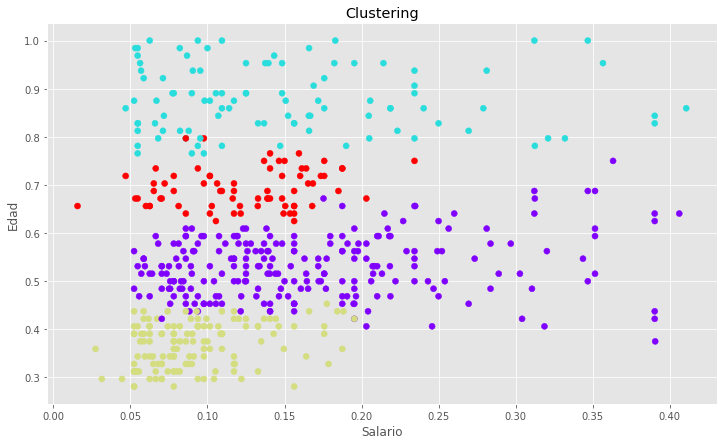

In [ ]:
plt.figure(figsize=(12, 7))  
plt.scatter(datanorm[:,0], datanorm[:,3], c=cluster.labels_, cmap='rainbow')
plt.xlabel("Salario")
plt.ylabel("Edad")
plt.title("Clustering")

KMEANS


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

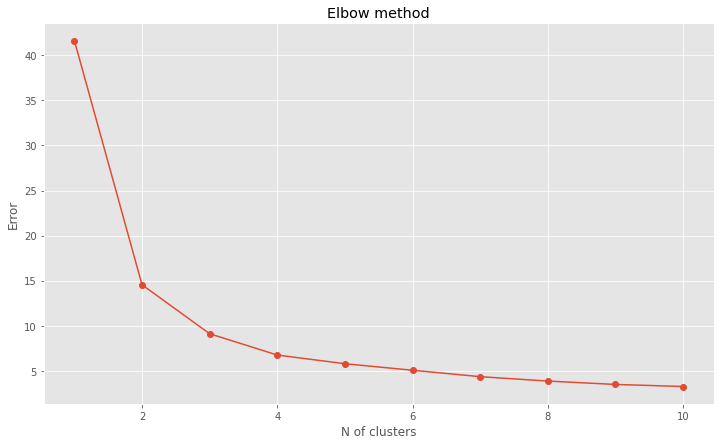

In [ ]:

Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(datanorm)
    kmeans.fit(datanorm)
    Error.append(kmeans.inertia_)
plt.figure(figsize=(12, 7))
plt.plot(range(1, 11), Error, marker= "o")
plt.title('Elbow method')
plt.xlabel('N of clusters')
plt.ylabel('Error')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4)
y_kmeans = kmeans.fit_predict(datanorm)
print(y_kmeans)

kmeans.cluster_centers_

[0 1 2 2 0 2 3 0 0 2 0 0 3 3 3 1 1 3 0 3 0 1 2 0 3 1 2 3 2 2 0 1 0 2 0 1 0
 1 2 0 2 0 0 0 2 0 0 0 3 2 2 0 2 0 2 2 0 0 3 3 0 3 1 2 2 3 0 0 1 1 2 0 0 2
 1 1 3 0 0 1 0 0 1 0 2 0 0 0 2 1 2 3 2 2 3 2 0 3 0 0 0 0 2 3 0 2 3 1 2 1 0
 0 1 2 3 2 2 0 0 0 2 0 3 0 2 2 3 0 2 0 2 2 2 2 0 2 2 1 1 2 0 0 0 3 3 1 2 1
 0 2 3 3 2 0 2 0 0 3 2 2 3 3 0 0 3 2 0 2 3 3 1 2 3 3 0 3 0 1 1 3 2 0 0 3 0
 0 3 0 0 1 0 2 0 0 2 3 0 1 3 1 2 0 2 2 2 3 0 0 3 0 3 0 0 3 2 3 1 2 0 3 3 1
 2 0 2 0 3 2 2 1 2 0 2 2 0 3 0 3 1 3 2 2 3 0 2 1 2 0 0 0 2 3 0 3 2 0 3 0 0
 0 3 1 0 0 3 2 3 1 0 1 0 0 3 2 3 2 2 1 0 2 2 3 2 2 0 1 3 1 2 3 2 0 2 3 3 0
 0 2 0 0 2 0 3 2 3 0 0 2 2 2 2 2 0 2 2 0 3 3 1 0 2 0 3 3 2 1 0 0 1 0 1 2 3
 0 3 0 0 1 2 1 2 2 2 0 0 1 0 3 3 3 0 1 1 1 0 1 2 0 2 3 0 3 0 2 2 2 1 0 1 1
 0 0 0 2 2 2 2 2 3 3 0 2 0 2 0 3 1 1 3 2 0 0 2 2 1 2 2 3 3 0 0 1 2 1 2 3 2
 2 1 1 0 1 2 2 3 3 2 2 3 0 2 0 2 1 1 0 1 1 0 3 2 0 3 0 2 2 0 2 0 1 2 2 0 0
 2 2 0 2 0 0 3 0 0 3 0 0 2 0 3 3 0 0 2 0 0 0 1 0 2 0 0 0 0 3 2 3 2 0 2 1 1
 0 2 1 0 2 0 0 3 0 3 0 2 

array([[0.15774119, 0.21209936, 0.22796474, 0.5338141 ],
       [0.13811458, 0.17625   , 0.63166667, 0.90166667],
       [0.10682492, 0.20913462, 0.07752404, 0.38000801],
       [0.15809257, 0.19973467, 0.41995873, 0.7134434 ]])

Text(0, 0.5, 'Experiencia')

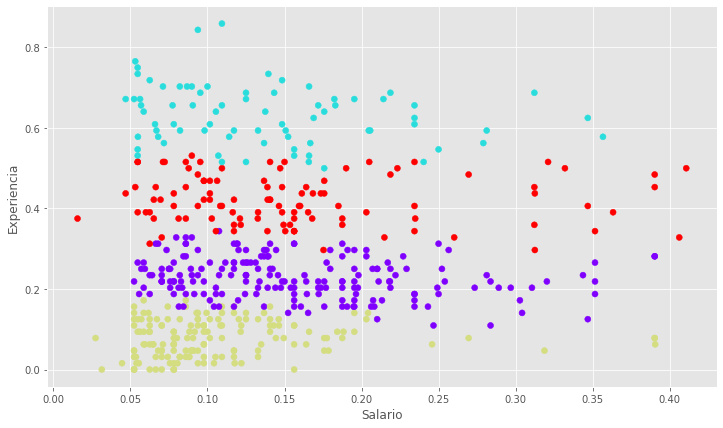

In [ ]:
plt.figure(figsize=(12, 7))
plt.scatter(datanorm[:,0],datanorm[:,2], c=y_kmeans, cmap="rainbow")
plt.xlabel("Salario")
plt.ylabel("Experiencia")

REGRESION LINEAL SIMPLE


In [ ]:

#Imports necesarios

import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

wage_X = datanorm[2]
wage_y = datanorm[0]
regresion_lineal = LinearRegression() # creamos una instancia de LinearRegression

# instruimos a la regresión lineal que aprenda de los datos (x,y)
regresion_lineal.fit(wage_X.reshape(-1,1), wage_y) 

# vemos los parámetros que ha estimado la regresión lineal
print('w = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))

# resultado: w = [0.09183522], b = 1.2858792525736682

NameError: ignored

In [ ]:
# importamos el cálculo del error cuadrático medio (MSE)
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(wage_X.reshape(-1,1))
# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse = mean_squared_error(y_true = wage_y, y_pred = prediccion_entrenamiento)
# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))
print('Variance score: %.2f' % r2_score(wage_y, prediccion_entrenamiento))


NameError: ignored

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(wage_X, wage_y)
plt.plot(wage_X, prediccion_entrenamiento, color='black')
plt.show()

Coefficients: 
 [0.04349425]
Independent term: 
 8.190610281499703
Mean squared error: 23.75
Variance score: 0.01


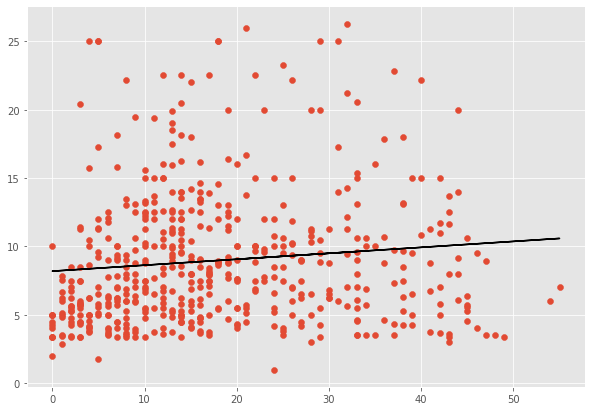

In [ ]:
dataX =df1[["experience"]]
X_train = np.array(dataX)
y_train = df1['wage'].values
 
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, color='black')
plt.show()

REGRESION LINEAL MULTIPLE

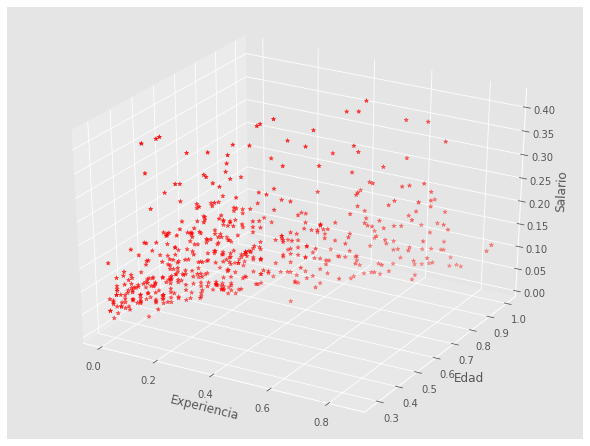

In [ ]:
from matplotlib import pyplot             # Permite la generación de gráficos
from mpl_toolkits.mplot3d import Axes3D   # Permite agregar eje tridimensionales

fig = pyplot.figure(figsize=(8, 6))       # Ajustes del gráfico
ax = Axes3D(fig)

x1 = datanorm[:,2]                             # Datos eje X
x2 = datanorm[:,3]                             # Datos eje Y
y = datanorm[:,0]                               # Datos eje Z (Var. Respuesta)

ax.scatter(x1, x2, y, marker='*', c='r')
ax.set_xlabel('Experiencia')        # Etiqueta del eje X
ax.set_ylabel('Edad')       # Etiqueta del eje Y
ax.set_zlabel('Salario');   

(532, 532)


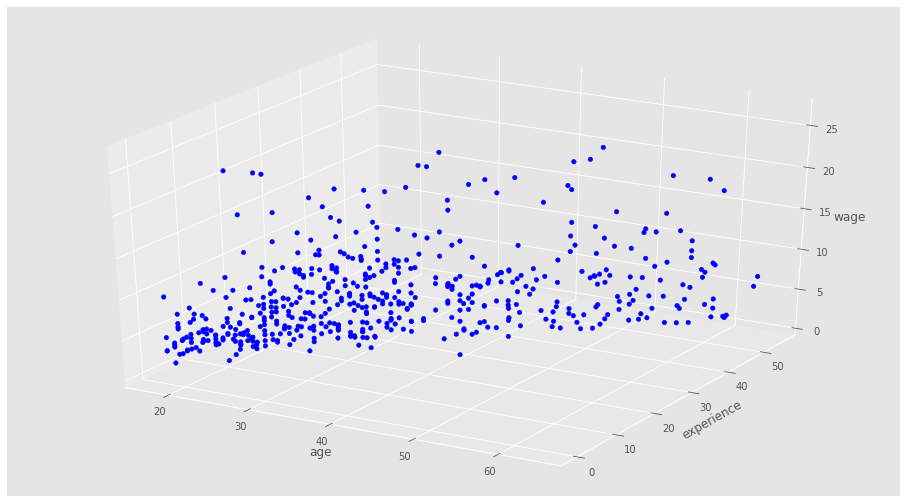

<Figure size 648x432 with 0 Axes>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from matplotlib import cm

model = sm.ols(formula='wage ~ age + experience', data = df1)
fit = model.fit()

fit.summary()

xx, yy = np.meshgrid(df1['age'], df1['experience'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 350, 20)                # generar una malla
y_surf = np.arange(0, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'age': x_surf.ravel(), 'experience': y_surf.ravel()})
out = fit.predict(exog = exog)

exog = pd.core.frame.DataFrame({'age':xx.ravel(),'experience':yy.ravel()})
out = fit.predict(exog=exog)

#ax.plot_surface(xx, yy, out.reshape(xx.shape), color='None')

print(xx.shape)

ax.scatter(df1['age'], df1['experience'], df1['wage'],
           c='blue',
           marker='o',
           alpha=1)



ax.set_xlabel('age')
ax.set_ylabel('experience')
ax.set_zlabel('wage')
plt.figure(figsize=(9, 6))
plt.show()

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

#Seleccionamos las columnas del dataset
X_multiple = datanorm[:, 1:4]
#Defino los datos correspondientes a las etiquetas
y_multiple = datanorm[:,0]


#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple, test_size=0.2)

#Defino el algoritmo a utilizar
lr_multiple = linear_model.LinearRegression()

#Entreno el modelo
lr_multiple.fit(X_train, y_train)

#Realizo una predicción
Y_pred_multiple = lr_multiple.predict(X_test)

print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print()
print('Valor de las pendientes o coeficientes "a":')
print(lr_multiple.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr_multiple.intercept_)

print('Precisión del modelo:')
print(lr_multiple.score(X_train, y_train))

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

Valor de las pendientes o coeficientes "a":
[ 0.55897038 -0.23151345  0.32745693]
Valor de la intersección o coeficiente "b":
-0.10205517578186021
Precisión del modelo:
0.2196805493645272


RANDOM FOREST


In [ ]:
df1.head()
df1.dtypes

In [ ]:
round(df1["wage"])
(df1["wage"]).astype(int)

In [ ]:
from sklearn.model_selection import train_test_split
X=df1[["education","wage","experience","age"]]  # Features
y=df1["ClustCateg"]  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.975


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
rfc_cv_score = cross_val_score(clf, X, y, cv=10, scoring="roc_auc")


ValueError: ignored

ANALISIS GENERAL


In [ ]:
df1.head()

,wage,education,experience,age,ethnicity,region,gender,occupation,sector,union,married,ClustCateg
0,5.10,8,21,35,hispanic,other,female,worker,manufacturing,no,yes,0
1,4.95,9,42,57,cauc,other,female,worker,manufacturing,no,yes,1
2,6.67,12,1,19,cauc,other,male,worker,manufacturing,no,no,2
3,4.00,12,4,22,cauc,other,male,worker,other,no,no,2
4,7.50,12,17,35,cauc,other,male,worker,other,no,yes,0


In [ ]:
df1.groupby('gender').size()

gender
female    244
male      288
dtype: int64

In [ ]:
df1.groupby('occupation').size()

occupation
management     54
office         97
sales          38
services       82
technical     105
worker        156
dtype: int64

In [ ]:
df1.groupby('union').size()

union
no     436
yes     96
dtype: int64

In [ ]:
df1.groupby('married').size()

married
no     182
yes    350
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


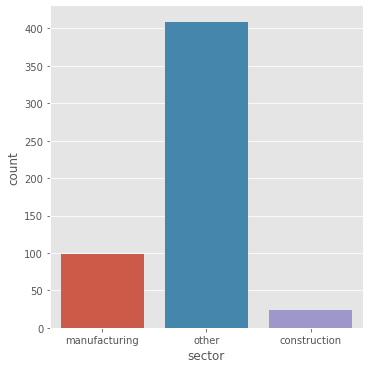

In [ ]:

sb.factorplot('sector',data = df1,kind="count")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


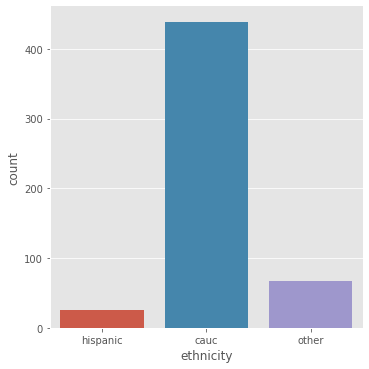

In [ ]:
sb.factorplot('ethnicity',data = df1,kind="count", aspect = 1)